In [441]:
import pandas as pd
import numpy as np

In [442]:
# Load the data
credit_data = pd.read_csv("details.csv")

In [443]:
credit_data.head(5)

,Unnamed: 0,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,ln_avg_card_spent
0,0,1,2.0,1,20,2,15,3,1,1,...,0,0,1,1,0,0,0,1,0,4.439470
1,1,5,5.0,0,22,2,17,4,2,0,...,1,1,1,1,1,1,0,0,0,3.887115
2,2,3,4.0,1,67,6,14,2,2,0,...,0,0,0,0,0,1,0,0,0,5.246945
3,3,4,3.0,0,23,2,16,3,2,0,...,0,1,1,1,0,1,1,0,0,5.245470
4,4,2,2.0,0,26,3,16,3,2,0,...,0,1,0,1,0,0,0,1,0,5.575627


In [444]:
credit_data.drop(['Unnamed: 0'], inplace=True, axis=1)
credit_data.head(5)

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,ln_avg_card_spent
0,1,2.0,1,20,2,15,3,1,1,0,...,0,0,1,1,0,0,0,1,0,4.439470
1,5,5.0,0,22,2,17,4,2,0,0,...,1,1,1,1,1,1,0,0,0,3.887115
2,3,4.0,1,67,6,14,2,2,0,16,...,0,0,0,0,0,1,0,0,0,5.246945
3,4,3.0,0,23,2,16,3,2,0,0,...,0,1,1,1,0,1,1,0,0,5.245470
4,2,2.0,0,26,3,16,3,2,0,1,...,0,1,0,1,0,0,0,1,0,5.575627


In [445]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 115 entries, region to ln_avg_card_spent
dtypes: float64(24), int64(91)
memory usage: 4.4 MB


In [446]:
credit_data.columns

Index(['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat',
       'jobcat', 'union', 'employ',
       ...
       'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03', 'ln_avg_card_spent'],
      dtype='object', length=115)

In [447]:
credit_data.isnull().any().sum()

0

In [448]:
credit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
region,5000.0,3.001400,1.421760,1.000000,2.000000,3.000000,4.000000,5.000000
townsize,5000.0,2.687275,1.425640,1.000000,1.000000,3.000000,4.000000,5.000000
gender,5000.0,0.503600,0.500037,0.000000,0.000000,1.000000,1.000000,1.000000
age,5000.0,47.025600,17.770338,18.000000,31.000000,47.000000,62.000000,79.000000
agecat,5000.0,4.238800,1.308785,2.000000,3.000000,4.000000,5.000000,6.000000
ed,5000.0,14.543000,3.281083,6.000000,12.000000,14.000000,17.000000,23.000000
edcat,5000.0,2.672000,1.211738,1.000000,2.000000,2.000000,4.000000,5.000000
jobcat,5000.0,2.752800,1.737900,1.000000,1.000000,2.000000,4.000000,6.000000
union,5000.0,0.151200,0.358280,0.000000,0.000000,0.000000,0.000000,1.000000
employ,5000.0,9.730400,9.690929,0.000000,2.000000,7.000000,15.000000,52.000000


In [532]:
corr_df = credit_data.corr()

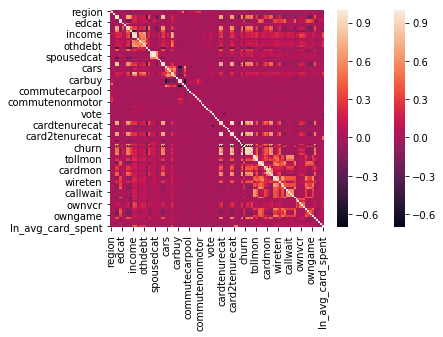

In [541]:
sns.heatmap(corr_df)
plt.show()

In [449]:
feature_columns = credit_data.columns.difference( ['ln_avg_card_spent'] )
feature_columns1 = feature_columns[1:20]

In [450]:
feature_columns1

Index(['address', 'addresscat', 'age', 'agecat', 'bfast', 'callcard', 'callid',
       'callwait', 'carbought', 'carbuy', 'carcatvalue', 'card', 'card2',
       'card2benefit', 'card2fee', 'card2items', 'card2tenure',
       'card2tenurecat', 'card2type'],
      dtype='object')

In [451]:
len(feature_columns)

114

In [452]:
credit_data.groupby('agecat').agg({'age': 'mean'})

,age
agecat,
2,20.979100
3,29.459127
4,41.802782
5,56.955649
6,71.748127


In [453]:
credit_data.groupby('addresscat').agg({'ln_avg_card_spent': 'mean'})

,ln_avg_card_spent
addresscat,
1,5.230593
2,5.317759
3,5.408778
4,5.431962
5,5.376741


In [454]:
#We will drop address related vars as they don't really make a difference

In [455]:
credit_data.groupby('region').agg({'ln_avg_card_spent': 'mean'})

,ln_avg_card_spent
region,
1,5.327471
2,5.365347
3,5.367914
4,5.379794
5,5.404323


In [456]:
#We'll drop region as well.

In [457]:
credit_data.groupby('edcat').agg({'ed': 'mean'})

,ed
edcat,
1,9.836152
2,13.065093
3,15.475538
4,17.868587
5,20.533898


In [458]:
#Drop ed also

In [459]:
credit_data.groupby('inccat').agg({'debtinc': 'mean'})

,debtinc
inccat,
1,9.724887
2,10.085810
3,9.833731
4,10.310615
5,9.791927


In [460]:
var_list = list
(credit_data.columns)

Index(['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat',
       'jobcat', 'union', 'employ',
       ...
       'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03', 'ln_avg_card_spent'],
      dtype='object', length=115)

In [461]:
var_list

list

In [462]:
final_var_list = credit_data.columns.difference(['region','age','ed','employ','income','lninc', 'creddebt', 'othdebt', 'spoused', 'address', 'addresscat', 'carvalue', 'commute', 'cardtenure', 'card2tenure','longmon', 'longten', 'cardmon', 'cardten', 'longmon', 'longten'])

In [463]:
credit_data_final = credit_data[final_var_list]

In [464]:
print(list(credit_data_final.columns))

['active', 'agecat', 'bfast', 'callcard', 'callid', 'callwait', 'carbought', 'carbuy', 'carcatvalue', 'card', 'card2', 'card2benefit', 'card2fee', 'card2items', 'card2tenurecat', 'card2type', 'cardbenefit', 'cardfee', 'carditems', 'cardtenurecat', 'cardtype', 'carown', 'cars', 'cartype', 'churn', 'commutebike', 'commutebus', 'commutecar', 'commutecarpool', 'commutecat', 'commutemotorcycle', 'commutenonmotor', 'commutepublic', 'commuterail', 'commutetime', 'commutewalk', 'confer', 'debtinc', 'default', 'ebill', 'edcat', 'empcat', 'equip', 'equipmon', 'equipten', 'forward', 'gender', 'homeown', 'hometype', 'hourstv', 'inccat', 'internet', 'jobcat', 'jobsat', 'ln_avg_card_spent', 'lncardmon', 'lncardten', 'lncreddebt', 'lnlongmon', 'lnlongten', 'lnothdebt', 'marital', 'multline', 'news', 'owncd', 'owndvd', 'ownfax', 'owngame', 'ownipod', 'ownpc', 'ownpda', 'owntv', 'ownvcr', 'pager', 'polcontrib', 'polparty', 'polview', 'reason', 'reside', 'response_01', 'response_02', 'response_03', 'ret

In [465]:
feature_columns = credit_data_final.columns.difference( ['ln_avg_card_spent'] )
feature_columns1 = feature_columns[1:5]

In [466]:
feature_columns1

Index(['agecat', 'bfast', 'callcard', 'callid'], dtype='object')

In [467]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split( credit_data_final[feature_columns],
                                                  credit_data_final['ln_avg_card_spent'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [468]:
train_y.head(5)

4227    5.482096
4676    5.631624
800     5.378306
3671    4.559231
4193    4.861013
Name: ln_avg_card_spent, dtype: float64

Using Decision trees for prediction now

In [469]:
import sklearn.tree as dt

In [470]:
import sklearn.ensemble as en

In [471]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export
from sklearn.grid_search import GridSearchCV

In [472]:
DecisionTreeRegressor?

In [473]:
#clf_tree = DecisionTreeRegressor( max_depth = 3 )
clf_tree = DecisionTreeRegressor()
clf_tree.fit( train_X, train_y )

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [474]:
train_y_pred = pd.DataFrame(clf_tree.predict(train_X))

In [475]:
#type(train_y_pred)
train_y_pred.shape

(4000, 1)

In [476]:
train_xy_diff = pd.concat([train_X, train_y], axis=1)

In [477]:
#train_xy_diff['pred_ln_avg_card_spent'] = train_y_pred
train_xy_diff = pd.concat([train_xy_diff, train_y_pred], axis=1)

In [478]:
train_xy_diff.head(5)

,active,agecat,bfast,callcard,callid,callwait,carbought,carbuy,carcatvalue,card,...,tollten,townsize,union,voice,vote,wireless,wiremon,wireten,ln_avg_card_spent,0
0,0.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,...,161.05,2.0,1.0,1.0,1.0,0.0,0.00,0.00,4.439470,5.482096
1,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,...,0.00,5.0,0.0,1.0,0.0,1.0,45.65,1683.55,3.887115,5.631624
2,0.0,6.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0.00,4.0,0.0,0.0,0.0,0.0,0.00,0.00,5.246945,5.378306
3,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0.00,3.0,0.0,0.0,0.0,0.0,0.00,0.00,5.245470,4.559231
4,1.0,3.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,...,387.70,2.0,0.0,1.0,0.0,1.0,19.05,410.80,5.575627,4.861013


In [479]:
var_list = list(train_xy_diff.columns)
print(var_list)

['active', 'agecat', 'bfast', 'callcard', 'callid', 'callwait', 'carbought', 'carbuy', 'carcatvalue', 'card', 'card2', 'card2benefit', 'card2fee', 'card2items', 'card2tenurecat', 'card2type', 'cardbenefit', 'cardfee', 'carditems', 'cardtenurecat', 'cardtype', 'carown', 'cars', 'cartype', 'churn', 'commutebike', 'commutebus', 'commutecar', 'commutecarpool', 'commutecat', 'commutemotorcycle', 'commutenonmotor', 'commutepublic', 'commuterail', 'commutetime', 'commutewalk', 'confer', 'debtinc', 'default', 'ebill', 'edcat', 'empcat', 'equip', 'equipmon', 'equipten', 'forward', 'gender', 'homeown', 'hometype', 'hourstv', 'inccat', 'internet', 'jobcat', 'jobsat', 'lncardmon', 'lncardten', 'lncreddebt', 'lnlongmon', 'lnlongten', 'lnothdebt', 'marital', 'multline', 'news', 'owncd', 'owndvd', 'ownfax', 'owngame', 'ownipod', 'ownpc', 'ownpda', 'owntv', 'ownvcr', 'pager', 'polcontrib', 'polparty', 'polview', 'reason', 'reside', 'response_01', 'response_02', 'response_03', 'retire', 'spousedcat', '

In [480]:
var_list = ['active', 'agecat', 'bfast', 'callcard', 'callid', 'callwait', 'carbought', 'carbuy', 'carcatvalue', 'card', 'card2', 'card2benefit', 'card2fee', 'card2items', 'card2tenurecat', 'card2type', 'cardbenefit', 'cardfee', 'carditems', 'cardtenurecat', 'cardtype', 'carown', 'cars', 'cartype', 'churn', 'commutebike', 'commutebus', 'commutecar', 'commutecarpool', 'commutecat', 'commutemotorcycle', 'commutenonmotor', 'commutepublic', 'commuterail', 'commutetime', 'commutewalk', 'confer', 'debtinc', 'default', 'ebill', 'edcat', 'empcat', 'equip', 'equipmon', 'equipten', 'forward', 'gender', 'homeown', 'hometype', 'hourstv', 'inccat', 'internet', 'jobcat', 'jobsat', 'lncardmon', 'lncardten', 'lncreddebt', 'lnlongmon', 'lnlongten', 'lnothdebt', 'marital', 'multline', 'news', 'owncd', 'owndvd', 'ownfax', 'owngame', 'ownipod', 'ownpc', 'ownpda', 'owntv', 'ownvcr', 'pager', 'polcontrib', 'polparty', 'polview', 'reason', 'reside', 'response_01', 'response_02', 'response_03', 'retire', 'spousedcat', 'telecommute', 'tenure', 'tollfree', 'tollmon', 'tollten', 'townsize', 'union', 'voice', 'vote', 'wireless', 'wiremon', 'wireten', 'ln_avg_card_spent', 'pred_card_spent']

In [481]:
train_data = pd.DataFrame(train_xy_diff.values, columns = var_list)

In [482]:
train_data.head(5)

,active,agecat,bfast,callcard,callid,callwait,carbought,carbuy,carcatvalue,card,...,tollten,townsize,union,voice,vote,wireless,wiremon,wireten,ln_avg_card_spent,pred_card_spent
0,0.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,...,161.05,2.0,1.0,1.0,1.0,0.0,0.00,0.00,4.439470,5.482096
1,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,...,0.00,5.0,0.0,1.0,0.0,1.0,45.65,1683.55,3.887115,5.631624
2,0.0,6.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0.00,4.0,0.0,0.0,0.0,0.0,0.00,0.00,5.246945,5.378306
3,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0.00,3.0,0.0,0.0,0.0,0.0,0.00,0.00,5.245470,4.559231
4,1.0,3.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,...,387.70,2.0,0.0,1.0,0.0,1.0,19.05,410.80,5.575627,4.861013


In [483]:
test_y_pred = pd.DataFrame(clf_tree.predict(test_X))

In [484]:
test_y_pred.head(5)

,0
0,4.968006
1,5.247629
2,4.210051
3,6.392838
4,6.050146


In [485]:
rmse_train = np.sqrt( metrics.mean_squared_error(train_y, train_y_pred))
rmse_test = np.sqrt( metrics.mean_squared_error(test_y, test_y_pred))
r2_score_train = metrics.r2_score(train_y, train_y_pred)
r2_score_test = metrics.r2_score(test_y, test_y_pred)                                  

In [486]:
print("RMSE for training data: " ,rmse_train)
print("RMSE for test data: " ,rmse_test)
print("R sq for for training data: " ,r2_score_train)
print("R sq for test data: " ,r2_score_test)

RMSE for training data:  1.98794767538e-05
RMSE for test data:  0.5098109552
R sq for for training data:  0.999999998968
R sq for test data:  0.354821715839


In [748]:
#Above results show the that the model has overfitted the training data

# Tuning the parameters

In [487]:
param_grid = {'max_depth': np.arange(3, 13),
             'max_features': np.arange(15,40)}

In [488]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit( train_X, train_y )

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), 'max_features': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [489]:
tree.best_params_

{'max_depth': 7, 'max_features': 39}

In [490]:
tree.best_score_

0.5346439850402207

# Building final decison tree model

In [491]:
clf_tree = DecisionTreeRegressor( max_depth = 6, max_features=29 )
clf_tree.fit( train_X, train_y )

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=29,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [492]:
train_Y_pred = clf_tree.predict(train_X)

In [493]:
test_Y_pred = clf_tree.predict(test_X)

In [494]:
rmse_train = np.sqrt( metrics.mean_squared_error(train_y, train_Y_pred))
rmse_test = np.sqrt( metrics.mean_squared_error(test_y, test_Y_pred))
r2_score_train = metrics.r2_score(train_y, train_Y_pred)
r2_score_test = metrics.r2_score(test_y, test_Y_pred)                                  

In [495]:
print("RMSE for training data: " ,rmse_train)
print("RMSE for test data: " ,rmse_test)
print("R sq for for training data: " ,r2_score_train)
print("R sq for test data: " ,r2_score_test)

RMSE for training data:  0.402374267511
RMSE for test data:  0.441351898464
R sq for for training data:  0.577323779044
R sq for test data:  0.516461106995


In [749]:
#Above model fits the training data and test data with almost same accuracy

# Using bagged decision trees

In [496]:
import sklearn.ensemble as en

In [497]:
from sklearn.ensemble import BaggingRegressor

In [498]:
BaggingRegressor?

In [499]:
bagrgm = BaggingRegressor(oob_score=True, n_estimators=100)
bagrgm.fit(train_X, train_y)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
         verbose=0, warm_start=False)

In [500]:
y_pred_train = pd.DataFrame( { 'actual':  train_y,
                            'predicted': bagrgm.predict(train_X) } )

In [501]:
y_pred_train.head(5)

,actual,predicted
4227,5.482096,5.398946
4676,5.631624,5.612815
800,5.378306,5.530955
3671,4.559231,4.683397
4193,4.861013,5.022846


In [502]:
y_pred_test = pd.DataFrame( { 'actual':  test_y,
                            'predicted': bagrgm.predict( test_X) } )

In [503]:
rmse_train = np.sqrt( metrics.mean_squared_error(y_pred_train['actual'], y_pred_train['predicted']))
rmse_test = np.sqrt( metrics.mean_squared_error(y_pred_test['actual'], y_pred_test['predicted']))
r2_score_train = metrics.r2_score(y_pred_train['actual'], y_pred_train['predicted'])
r2_score_test = metrics.r2_score(y_pred_test['actual'], y_pred_test['predicted'])         

print("RMSE for training data: " ,rmse_train)
print("RMSE for test data: " ,rmse_test)
print("R sq for for training data: " ,r2_score_train)
print("R sq for test data: " ,r2_score_test)

RMSE for training data:  0.135406311212
RMSE for test data:  0.36215994349
R sq for for training data:  0.952134209931
R sq for test data:  0.674416609617


# Random Forest

In [504]:
from sklearn.ensemble import RandomForestRegressor

In [505]:
RandomForestRegressor?

In [506]:
radm_rgs = RandomForestRegressor(oob_score=True,n_estimators=100 )
radm_rgs.fit( train_X, train_y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [507]:
radm_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': radm_rgs.predict( train_X ) } )

In [508]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_rgs.predict( test_X ) } )

In [509]:
rmse_train = np.sqrt( metrics.mean_squared_error(radm_train_pred['actual'], radm_train_pred['predicted']))
rmse_test = np.sqrt( metrics.mean_squared_error(radm_test_pred['actual'], radm_test_pred['predicted']))
r2_score_train = metrics.r2_score(radm_train_pred['actual'], radm_train_pred['predicted'])
r2_score_test = metrics.r2_score(radm_test_pred['actual'], radm_test_pred['predicted'])         

print("RMSE for training data: " ,rmse_train)
print("RMSE for test data: " ,rmse_test)
print("R sq for for training data: " ,r2_score_train)
print("R sq for test data: " ,r2_score_test)

RMSE for training data:  0.133796612403
RMSE for test data:  0.365136929284
R sq for for training data:  0.953265494368
R sq for test data:  0.669041963229


Feature importance from the Random Forest Model

In [510]:
indices = np.argsort(radm_rgs.feature_importances_)[::-1]
print(indices)

[18 13  9 50 10 59 56 37 49 54 57 34 55 58 84  8 75 87 86 88 53 11 52 44 16
 22 77 43 20 15 40  1 48 82 51 41 94 29  2 93 76 46 81 14  7  6 73 26  0 19
 35 23 66 47 91 21 28 74 33 89 68 79 25 12 61 67 30 62 83 24  5 17  4 36 64
 45 80 38 32 39 90 69  3 27 71 65 78 60 72 63 31 85 92 42 70]


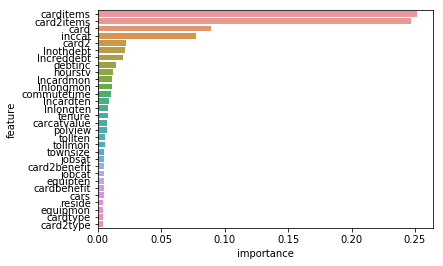

In [511]:
import seaborn as sns
import matplotlib.pyplot as plt

indices = np.argsort(radm_rgs.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_rgs.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank[0:30])
plt.show()

In [512]:
feature_rank.head(10)

,rank,feature,importance
0,1,carditems,0.251362
1,2,card2items,0.246607
2,3,card,0.088832
3,4,inccat,0.077285
4,5,card2,0.022223
5,6,lnothdebt,0.021594
6,7,lncreddebt,0.019947
7,8,debtinc,0.014709
8,9,hourstv,0.012346
9,10,lncardmon,0.011503


As per the results, the top features affecting the credit card spent are

carditems, card2items, card, inccat, lnotherdebt

# Boosting

In [513]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [514]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [515]:
from sklearn.grid_search import GridSearchCV
gscv_ada = GridSearchCV(estimator=AdaBoostRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [516]:
gscv_ada.fit(train_X, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  9.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [517]:
gscv_ada.best_params_

{'learning_rate': 1, 'n_estimators': 400}

In [518]:
rgs_ada = gscv_ada.best_estimator_

In [519]:
gscv_ada.best_score_

0.6169861687642725

In [525]:
AdaBoostRegressor?

In [526]:
ad = AdaBoostRegressor(n_estimators=400, learning_rate=1)
ad.fit(train_X, train_y)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
         n_estimators=400, random_state=None)

In [527]:
from sklearn.cross_validation import cross_val_score

In [528]:
print(pd.Series(cross_val_score(rgs_ada, 
                             train_X, train_y, cv=10)).describe()[['min', 'mean', 'max']])

print(pd.Series(cross_val_score(rgs_ada, 
                             test_X, test_y, cv=10)).describe()[['min', 'mean', 'max']])

min     0.556252
mean    0.614431
max     0.663202
dtype: float64
min     0.468004
mean    0.612146
max     0.724547
dtype: float64


In [530]:
print(pd.Series(cross_val_score(rgs_ada, 
                             train_X, train_y, cv=10)))

0    0.559141
1    0.609367
2    0.578480
3    0.668757
4    0.599745
5    0.632616
6    0.610843
7    0.654578
8    0.643121
9    0.609630
dtype: float64


# Using signifdicant variables

In [575]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [576]:
columns_x = "+".join(credit_data.columns.difference( ['ln_avg_card_spent'] ))
print(columns_x)
my_formula = "ln_avg_card_spent~" + columns_x
print(my_formula)

active+address+addresscat+age+agecat+bfast+callcard+callid+callwait+carbought+carbuy+carcatvalue+card+card2+card2benefit+card2fee+card2items+card2tenure+card2tenurecat+card2type+cardbenefit+cardfee+carditems+cardmon+cardten+cardtenure+cardtenurecat+cardtype+carown+cars+cartype+carvalue+churn+commute+commutebike+commutebus+commutecar+commutecarpool+commutecat+commutemotorcycle+commutenonmotor+commutepublic+commuterail+commutetime+commutewalk+confer+creddebt+debtinc+default+ebill+ed+edcat+empcat+employ+equip+equipmon+equipten+forward+gender+homeown+hometype+hourstv+inccat+income+internet+jobcat+jobsat+lncardmon+lncardten+lncreddebt+lninc+lnlongmon+lnlongten+lnothdebt+longmon+longten+marital+multline+news+othdebt+owncd+owndvd+ownfax+owngame+ownipod+ownpc+ownpda+owntv+ownvcr+pager+polcontrib+polparty+polview+reason+region+reside+response_01+response_02+response_03+retire+spoused+spousedcat+telecommute+tenure+tollfree+tollmon+tollten+townsize+union+voice+vote+wireless+wiremon+wireten
ln_avg

In [577]:
y,X = dmatrices(my_formula, credit_data, return_type='dataframe')

In [578]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [579]:
vif.shape

(115, 2)

In [580]:
vif.sort_values(by='VIF Factor', inplace = True, ascending=False)
vif.reset_index(drop=True, inplace=True)
vif.head(10)

,VIF Factor,features
0,947.944397,Intercept
1,170.609542,longmon
2,150.904565,longten
3,128.229220,spoused
4,59.806420,spousedcat
5,40.351726,commutecat
6,37.641056,equipmon
7,36.506401,commute
8,34.222086,card2tenure
9,30.292760,lnlongmon


In [599]:
large_vif_features = vif[vif['VIF Factor'] > 4]['features']

In [600]:
print(list(large_vif_features))

['Intercept', 'longmon', 'longten', 'spoused', 'spousedcat', 'commutecat', 'equipmon', 'commute', 'card2tenure', 'lnlongmon', 'wiremon', 'cardmon', 'tenure', 'lnlongten', 'marital', 'lninc', 'age', 'cardtenure', 'agecat', 'equip', 'card2tenurecat', 'tollmon', 'ed', 'cardten', 'edcat', 'wireten', 'inccat', 'cardtenurecat', 'tollten', 'addresscat', 'carvalue', 'income', 'lncardmon', 'address', 'equipten', 'callcard', 'carcatvalue', 'employ', 'wireless', 'empcat', 'lnothdebt', 'lncardten', 'debtinc', 'tollfree', 'othdebt']


In [601]:
#Dropping above variables except Intercept

In [603]:
#large_vif_features = ['longmon', 'longten', 'spoused', 'spousedcat', 'commutecat', 'equipmon', 'commute', 'card2tenure', 'lnlongmon', 'wiremon', 'cardmon', 'tenure', 'lnlongten', 'marital', 'lninc', 'age', 'cardtenure', 'agecat', 'equip', 'card2tenurecat', 'tollmon', 'ed', 'cardten', 'edcat', 'wireten', 'inccat', 'cardtenurecat', 'tollten', 'addresscat']
#large_vif_features = ['longmon', 'longten', 'spoused', 'spousedcat', 'commutecat', 'equipmon', 'commute', 'card2tenure', 'lnlongmon', 'wiremon', 'cardmon', 'tenure', 'lnlongten', 'marital', 'lninc', 'age', 'cardtenure', 'agecat', 'equip', 'card2tenurecat', 'tollmon', 'ed', 'cardten', 'edcat', 'wireten', 'inccat', 'cardtenurecat', 'tollten', 'addresscat', 'carvalue', 'income', 'lncardmon', 'address', 'equipten', 'callcard', 'carcatvalue']
large_vif_features = ['longmon', 'longten', 'spoused', 'spousedcat', 'commutecat', 'equipmon', 'commute', 'card2tenure', 'lnlongmon', 'wiremon', 'cardmon', 'tenure', 'lnlongten', 'marital', 'lninc', 'age', 'cardtenure', 'agecat', 'equip', 'card2tenurecat', 'tollmon', 'ed', 'cardten', 'edcat', 'wireten', 'inccat', 'cardtenurecat', 'tollten', 'addresscat', 'carvalue', 'income', 'lncardmon', 'address', 'equipten', 'callcard', 'carcatvalue', 'employ', 'wireless', 'empcat', 'lnothdebt', 'lncardten', 'debtinc', 'tollfree', 'othdebt']

In [604]:
cols_list = credit_data.columns.difference(large_vif_features) 

In [605]:
print(len(cols_list))

71


In [606]:
credit_data_new = credit_data[cols_list]

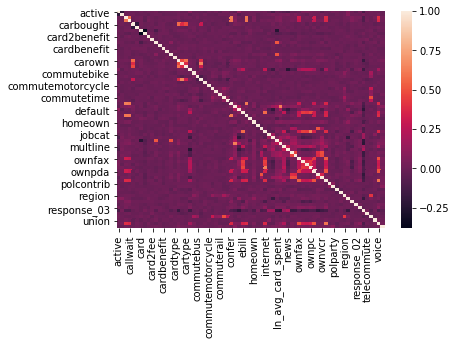

In [607]:
sns.heatmap(credit_data_new.corr())
plt.show()

In [608]:
columns_x = "+".join(credit_data_new.columns.difference( ['ln_avg_card_spent'] ))
print(columns_x)
my_formula = "ln_avg_card_spent~" + columns_x
print(my_formula)

active+bfast+callid+callwait+carbought+carbuy+card+card2+card2benefit+card2fee+card2items+card2type+cardbenefit+cardfee+carditems+cardtype+carown+cars+cartype+churn+commutebike+commutebus+commutecar+commutecarpool+commutemotorcycle+commutenonmotor+commutepublic+commuterail+commutetime+commutewalk+confer+creddebt+default+ebill+forward+gender+homeown+hometype+hourstv+internet+jobcat+jobsat+lncreddebt+multline+news+owncd+owndvd+ownfax+owngame+ownipod+ownpc+ownpda+owntv+ownvcr+pager+polcontrib+polparty+polview+reason+region+reside+response_01+response_02+response_03+retire+telecommute+townsize+union+voice+vote
ln_avg_card_spent~active+bfast+callid+callwait+carbought+carbuy+card+card2+card2benefit+card2fee+card2items+card2type+cardbenefit+cardfee+carditems+cardtype+carown+cars+cartype+churn+commutebike+commutebus+commutecar+commutecarpool+commutemotorcycle+commutenonmotor+commutepublic+commuterail+commutetime+commutewalk+confer+creddebt+default+ebill+forward+gender+homeown+hometype+hourstv+

In [609]:
import statsmodels.formula.api as smf
lm1=smf.ols(my_formula, credit_data_new).fit()

In [610]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_avg_card_spent   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 06 Sep 2018   Prob (F-statistic):               0.00
Time:                        06:50:36   Log-Likelihood:                -2427.4
No. Observations:                5000   AIC:                             4997.
Df Residuals:                    4929   BIC:                             5460.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.2649      0.077     55.120      0.000       4.113       4.417
active               -0.0077      0.012     -0.653      0.514      -0.031       0.015
bfast                 0.0111      0.007      1.587      0.112      -0.003       0.025
callid                0.0278      0.016      1.695      0.090      -0.004       0.060
callwait             -0.0034      0.016     -0.209      0.834      -0.035       0.028
carbought            -0.0011      0.012     -0.095      0.925      -0.025       0.023
carbuy                0.0113      0.012      0.933      0.351      -0.012       0.035
card                 -0.1198      0.005    -23.043      0.000      -0.130      -0.110
card2                -0.0650      0.005    -12.422      0.000      -0.075      -0.055
card2benefit         -0.0025      0.005     -0.489      0.625      -0.012       0.007
card2fee             -0.0097      0.014     -0.668      0.504      -0.038       0.019
card2items            0.1063      0.002     46.354      0.000       0.102       0.111
card2type             0.0068      0.005      1.351      0.177      -0.003       0.017
cardbenefit          -0.0040      0.005     -0.788      0.431      -0.014       0.006
cardfee               0.0039      0.014      0.274      0.784      -0.024       0.032
carditems             0.0803      0.002     47.907      0.000       0.077       0.084
cardtype              0.0020      0.005      0.390      0.697      -0.008       0.012
carown                0.0462      0.013      3.671      0.000       0.022       0.071
cars                  0.0016      0.006      0.262      0.793      -0.010       0.013
cartype              -0.0247      0.011     -2.237      0.025      -0.046      -0.003
churn                 0.0251      0.014      1.743      0.081      -0.003       0.053
commutebike          -0.0180      0.017     -1.031      0.302      -0.052       0.016
commutebus           -0.0015      0.012     -0.124      0.901      -0.024       0.021
commutecar           -0.0080      0.016     -0.494      0.621      -0.040       0.024
commutecarpool        0.0036      0.013      0.284      0.777      -0.021       0.029
commutemotorcycle     0.0084      0.019      0.455      0.649      -0.028       0.045
commutenonmotor      -0.0280      0.025     -1.110      0.267      -0.077       0.021
commutepublic         0.0049      0.019      0.254      0.800      -0.033       0.043
commuterail          -0.0164      0.013     -1.284      0.199      -0.041       0.009
commutetime          -0.0004      0.001     -0.336      0.737      -0.003       0.002
commutewalk          -0.0242      0.012     -2.000      0.046      -0.048      -0.000
confer                0.0137      0.016      0.834      0.404      -0.019       0.046
creddebt              0.0177      0.002      8.126      0.000       0.013

In [648]:
p_value_df = pd.DataFrame(lm1.pvalues)

In [649]:
p_value_df.reset_index(inplace=True)

In [652]:
p_value_df.columns = ['features', 'p-values']

In [653]:
p_value_df.head(5)

,features,p-values
0,Intercept,0.000000
1,active,0.513753
2,bfast,0.112464
3,callid,0.090060
4,callwait,0.834088


In [659]:
p_values_sorted = p_value_df.sort_values(by='p-values', ascending=False)
sig_p_value_df = p_values_sorted[p_values_sorted['p-values'] < 0.05]

In [660]:
sig_p_value_df

,features,p-values
30,commutewalk,4.557673e-02
58,polview,4.388523e-02
52,ownpda,2.587837e-02
19,cartype,2.535286e-02
54,ownvcr,2.308880e-02
46,owncd,2.193798e-02
64,response_03,1.746211e-02
69,voice,1.679133e-02
47,owndvd,1.904133e-03
42,jobsat,7.082584e-04


In [662]:
sig_p_value_df['features']

30    commutewalk
58        polview
52         ownpda
19        cartype
54         ownvcr
46          owncd
64    response_03
69          voice
47         owndvd
42         jobsat
17         carown
33        default
36         gender
43     lncreddebt
32       creddebt
65         retire
8           card2
7            card
15      carditems
11     card2items
0       Intercept
Name: features, dtype: object

In [663]:
#Printing the list of significant features

In [664]:
print(list(sig_p_value_df['features']))

['commutewalk', 'polview', 'ownpda', 'cartype', 'ownvcr', 'owncd', 'response_03', 'voice', 'owndvd', 'jobsat', 'carown', 'default', 'gender', 'lncreddebt', 'creddebt', 'retire', 'card2', 'card', 'carditems', 'card2items', 'Intercept']


In [665]:
credit_data_final = credit_data[['commutewalk', 'polview', 'ownpda', 'cartype', 'ownvcr', 'owncd', 'response_03', 'voice', 'owndvd', 'jobsat', 'carown', 'default', 'gender', 'lncreddebt', 'creddebt', 'retire', 'card2', 'card', 'carditems', 'card2items', 'ln_avg_card_spent']]

In [750]:
credit_data_final.head(5)
feature_columns = list(credit_data_final.columns.difference(['ln_avg_card_spent']))

In [751]:
#Using decision gtress

In [752]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split( credit_data_final[feature_columns],
                                                  credit_data_final['ln_avg_card_spent'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [765]:
rgs_tree = DecisionTreeRegressor( max_depth = 5 )
rgs_tree.fit( train_X, train_y )

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [766]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': rgs_tree.predict( train_X ) } )
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': rgs_tree.predict( test_X ) } )

In [767]:
tree_train_pred.head(10)

,actual,predicted
4227,5.482096,5.410217
4676,5.631624,5.679720
800,5.378306,5.189335
3671,4.559231,4.925783
4193,4.861013,5.410217
2968,5.297617,5.877541
4793,5.730944,5.410217
4368,5.010535,5.637997
2776,4.176155,4.925783
2970,6.509871,5.410217


In [768]:
rmse_train = np.sqrt( metrics.mean_squared_error(tree_train_pred['actual'], tree_train_pred['predicted']))
rmse_test = np.sqrt( metrics.mean_squared_error(tree_test_pred['actual'], tree_test_pred['predicted']))
r2_score_train = metrics.r2_score(tree_train_pred['actual'], tree_train_pred['predicted'])
r2_score_test = metrics.r2_score(tree_test_pred['actual'], tree_test_pred['predicted'])         

print("RMSE for training data: " ,rmse_train)
print("RMSE for test data: " ,rmse_test)
print("R sq for for training data: " ,r2_score_train)
print("R sq for test data: " ,r2_score_test)

RMSE for training data:  0.405550734316
RMSE for test data:  0.437206882116
R sq for for training data:  0.570623964415
R sq for test data:  0.525500899982


Above model is better than all above as its performance is not very different for trainig and test data. Also, it has moderate R2 values. Here, feature selection was done using VIF followed by variable selction using p-values.

In [682]:
#Selecting features based on feataure importance now

In [685]:
print(len(list(credit_data_new.columns)))

71


In [687]:
credit_data_new.columns

Index(['active', 'bfast', 'callid', 'callwait', 'carbought', 'carbuy', 'card',
       'card2', 'card2benefit', 'card2fee', 'card2items', 'card2type',
       'cardbenefit', 'cardfee', 'carditems', 'cardtype', 'carown', 'cars',
       'cartype', 'churn', 'commutebike', 'commutebus', 'commutecar',
       'commutecarpool', 'commutemotorcycle', 'commutenonmotor',
       'commutepublic', 'commuterail', 'commutetime', 'commutewalk', 'confer',
       'creddebt', 'default', 'ebill', 'forward', 'gender', 'homeown',
       'hometype', 'hourstv', 'internet', 'jobcat', 'jobsat',
       'ln_avg_card_spent', 'lncreddebt', 'multline', 'news', 'owncd',
       'owndvd', 'ownfax', 'owngame', 'ownipod', 'ownpc', 'ownpda', 'owntv',
       'ownvcr', 'pager', 'polcontrib', 'polparty', 'polview', 'reason',
       'region', 'reside', 'response_01', 'response_02', 'response_03',
       'retire', 'telecommute', 'townsize', 'union', 'voice', 'vote'],
      dtype='object')

In [711]:
feature_columns = ['active', 'bfast', 'callid', 'callwait', 'carbought', 'carbuy', 'card',
       'card2', 'card2benefit', 'card2fee', 'card2items', 'card2type',
       'cardbenefit', 'cardfee', 'carditems', 'cardtype', 'carown', 'cars',
       'cartype', 'churn', 'commutebike', 'commutebus', 'commutecar',
       'commutecarpool', 'commutemotorcycle', 'commutenonmotor',
       'commutepublic', 'commuterail', 'commutetime', 'commutewalk', 'confer',
       'creddebt', 'default', 'ebill', 'forward', 'gender', 'homeown',
       'hometype', 'hourstv', 'internet', 'jobcat', 'jobsat',
        'lncreddebt', 'multline', 'news', 'owncd',
       'owndvd', 'ownfax', 'owngame', 'ownipod', 'ownpc', 'ownpda', 'owntv',
       'ownvcr', 'pager', 'polcontrib', 'polparty', 'polview', 'reason',
       'region', 'reside', 'response_01', 'response_02', 'response_03',
       'retire', 'telecommute', 'townsize', 'union', 'voice', 'vote']

In [720]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split(credit_data_new[feature_columns],
                                                  credit_data_new['ln_avg_card_spent'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [721]:
rgs_tree = DecisionTreeRegressor()
rgs_tree.fit( train_X, train_y )

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [722]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': rgs_tree.predict( train_X ) } )
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': rgs_tree.predict( test_X ) } )

In [723]:
tree_train_pred.head(5)

,actual,predicted
4227,5.482096,5.482096
4676,5.631624,5.631624
800,5.378306,5.378306
3671,4.559231,4.559231
4193,4.861013,4.861013


In [724]:
rmse_train = np.sqrt( metrics.mean_squared_error(tree_train_pred['actual'], tree_train_pred['predicted']))
rmse_test = np.sqrt( metrics.mean_squared_error(tree_test_pred['actual'], tree_test_pred['predicted']))
r2_score_train = metrics.r2_score(tree_train_pred['actual'], tree_train_pred['predicted'])
r2_score_test = metrics.r2_score(tree_test_pred['actual'], tree_test_pred['predicted'])         

print("RMSE for training data: " ,rmse_train)
print("RMSE for test data: " ,rmse_test)
print("R sq for for training data: " ,r2_score_train)
print("R sq for test data: " ,r2_score_test)

RMSE for training data:  1.43446348731e-05
RMSE for test data:  0.534028019183
R sq for for training data:  0.999999999463
R sq for test data:  0.292071328439


In [725]:
#This is the case of overfitting. the model has overfitted the trainig data

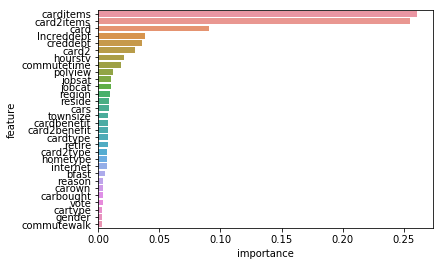

In [694]:
import seaborn as sns
import matplotlib.pyplot as plt

indices = np.argsort(radm_rgs.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_rgs.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank[0:30])
plt.show()

In [702]:
features_selected = feature_rank['feature'][0:23]

In [727]:
feature_rank[feature_rank['feature'] == 'ln_avg_card_spent']

,rank,feature,importance


In [728]:
#Building model again on selected features

In [729]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split(credit_data_new[features_selected],
                                                  credit_data_new['ln_avg_card_spent'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [745]:
rgs_tree = DecisionTreeRegressor(max_depth = 6)
rgs_tree.fit( train_X, train_y )

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [746]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': rgs_tree.predict( train_X ) } )
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': rgs_tree.predict( test_X ) } )

In [747]:
rmse_train = np.sqrt( metrics.mean_squared_error(tree_train_pred['actual'], tree_train_pred['predicted']))
rmse_test = np.sqrt( metrics.mean_squared_error(tree_test_pred['actual'], tree_test_pred['predicted']))
r2_score_train = metrics.r2_score(tree_train_pred['actual'], tree_train_pred['predicted'])
r2_score_test = metrics.r2_score(tree_test_pred['actual'], tree_test_pred['predicted'])         

print("RMSE for training data: " ,rmse_train)
print("RMSE for test data: " ,rmse_test)
print("R sq for for training data: " ,r2_score_train)
print("R sq for test data: " ,r2_score_test)

RMSE for training data:  0.381483237848
RMSE for test data:  0.423641271299
R sq for for training data:  0.620074592655
R sq for test data:  0.554489505177


This model is slightly better than one obtained before. Here we applied decision tree after feature selection. The feature selction was done using VIF (for multicollinearity) followed by feature selection using feature importance